# Life Expectancy and GDP

## 1. Project Goal

I will be identifying the relationship between the GDP and life expectancy of six countries (Chile, China, Germany, Mexico, United States of America, Zimbabwe) based on the data that was obtained from WHO

In [1]:
#import modules 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## 2. Dataset
I will be exploring the dataset to understand them better. 

In [2]:
#import the dataset into a dateframe
life_gdp = pd.read_csv('all_data.csv')

#display the dataset
life_gdp

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


### a. Country

In [3]:
#find unique values of the column: Country
countries = life_gdp['Country'].unique()
print('The data contains information about the following countries: {}'.format(countries))

The data contains information about the following countries: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


### b. Year

In [4]:
#find unique values of the columns: Year
year = life_gdp['Year'].unique()
print('The data span {}'.format(year))

The data span [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## c. Life expectancy at birth (years)

In [5]:
#

In [6]:
life_gdp.columns

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')

In [7]:
life_gdp.rename(columns = {"Life expectancy at birth (years)" : 'Life_expectancy'},inplace = True)

# 3. Analysis 

a. 

In [8]:
chile = life_gdp[life_gdp['Country'] == 'Chile']

In [9]:
chile

,Country,Year,Life_expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


In [10]:
chile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          16 non-null     object 
 1   Year             16 non-null     int64  
 2   Life_expectancy  16 non-null     float64
 3   GDP              16 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 640.0+ bytes


<AxesSubplot:xlabel='Year', ylabel='Life_expectancy'>

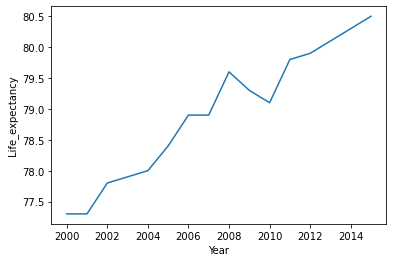

In [11]:
#plot Year against Life Expectancy for Chile
sns.lineplot(x = 'Year',y = 'Life_expectancy',data=chile)

<AxesSubplot:xlabel='Year', ylabel='GDP'>

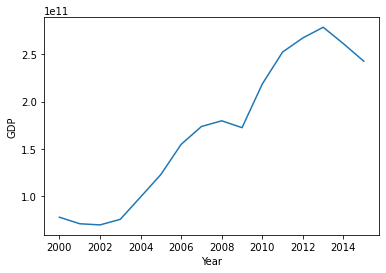

In [12]:
#plot Year against GDP for Chile
sns.lineplot(x= 'Year',y='GDP',data=chile)

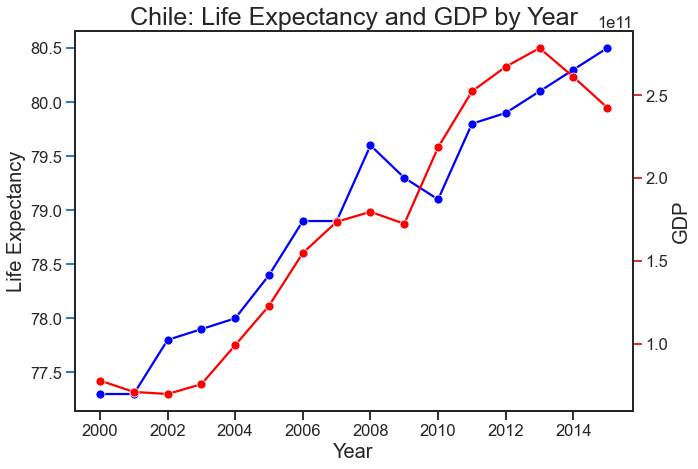

In [25]:
#create combo chart
fig,ax1 = plt.subplots(figsize = (10,7))
color = 'tab:blue'
#create the first line graph
sns.set_style('ticks')
sns.set_context('talk')
ax1.set_title('Chile: Life Expectancy and GDP by Year',fontsize =25)
ax1.set_xlabel('Year',fontsize=20)
ax1.set_ylabel('Life Expectancy',fontsize=20)
ax1 = sns.lineplot(x='Year',y='Life_expectancy',data = chile,color = 'blue',marker = 'o')
ax1.tick_params(axis='y',color=color)
#specify we want to share the x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#create the second line graph
ax2.set_ylabel('GDP',fontsize=20)
ax2 = sns.lineplot(x='Year',y='GDP',data=chile,color='red',marker = 'o')
ax2.tick_params(axis='y', color=color)



In [14]:
chile_2 = pd.melt(chile,'Year',)

In [15]:
#find average life expectancy and GDP by country
life_GDP_by_country = life_gdp.groupby('Country').agg({'GDP':"mean",'Life_expectancy': "mean"})

In [16]:
life_GDP_by_country

,GDP,Life_expectancy
Country,,
Chile,1.697888e+11,78.94375
China,4.957714e+12,74.26250
Germany,3.094776e+12,79.65625
Mexico,9.766506e+11,75.71875
United States of America,1.407500e+13,78.06250
Zimbabwe,9.062580e+09,50.09375


<AxesSubplot:xlabel='GDP', ylabel='Life_expectancy'>

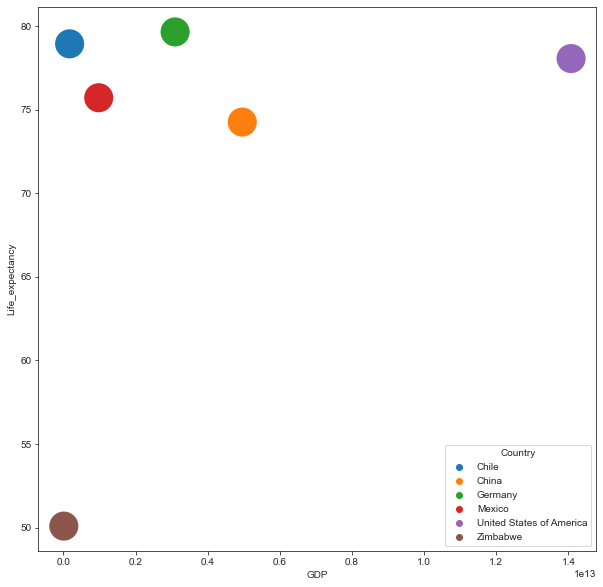

In [17]:
#plot GDP against life_expectancy
ax,fig = plt.subplots(figsize = (10,10))
sns.scatterplot(data = life_GDP_by_country, x='GDP', y='Life_expectancy',hue='Country',s=1000)